In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def val_to_min(s,g,l):
    return 1 - (2*g*s)/(l + s*g) +(s**2 * g**2)/(l**2 + 2*l*s*g + s**2 * g**2)

In [39]:
n_to_plot = 1000
s_vals = np.linspace(-1,1,n_to_plot)
g_vals = np.linspace(-10,10,n_to_plot)
l = -100
results = np.zeros((n_to_plot,n_to_plot))

In [40]:
for i in tqdm(range(n_to_plot)):
    for j in range(n_to_plot):
        results[i,j] = val_to_min(s_vals[i],g_vals[j],l)

100%|████████████████████| 1000/1000 [00:01<00:00, 512.15it/s]


In [13]:
X = []
Y = []
Z = []
for i in tqdm(range(n_to_plot)):
    for j in range(n_to_plot):
        Z.append(results[i,j])
        Y.append(s_vals[i])
        X.append(g_vals[i])
        

100%|███████████████████| 1000/1000 [00:00<00:00, 1500.02it/s]


TypeError: Input z must be 2D, not 1D

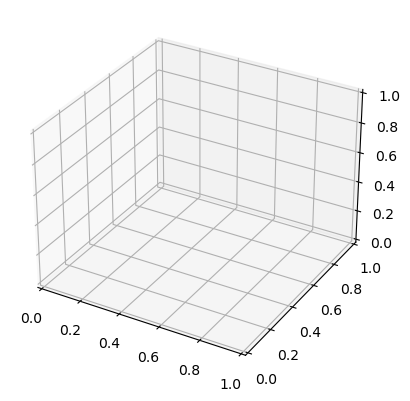

In [25]:
# Create a figure and a 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a contour plot
contour = ax.contourf(X, Y, Z)


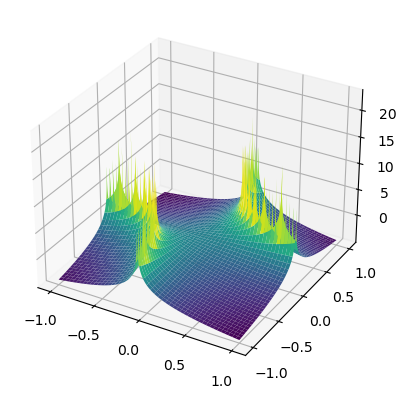

In [70]:
s_vals = np.linspace(-1,1,n_to_plot)
g_vals = np.linspace(-1,1,n_to_plot)
S, G = np.meshgrid(s_vals, g_vals)
Val = np.log(val_to_min(S,G,-.1))

# Create a figure and a 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
surface = ax.plot_surface(S, G, Val, cmap='viridis')
#ax.set_zlim(np.min(Val), 10**5)
#ax.set_zscale("log")

(array([9.9986e+05, 4.8000e+01, 2.0000e+01, 1.6000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

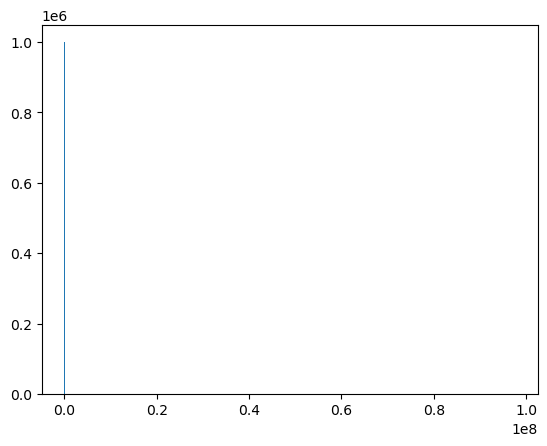

In [58]:
plt.hist(np.ravel(Val),bins = 1000)

In [71]:
np.argwhere(Val == np.min(Val))

array([[  0, 999],
       [999,   0]])

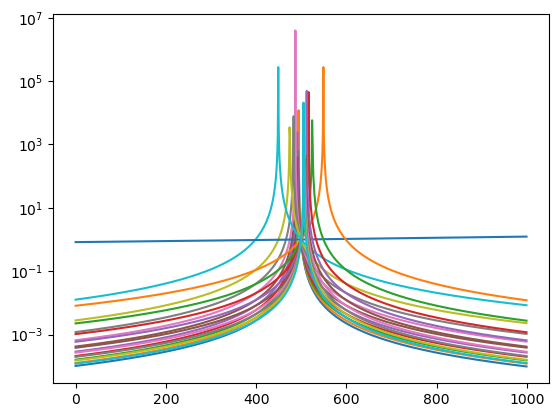

In [66]:
for i in range(0,1000,50):
    plt.plot(Val[i,:])
plt.yscale('log')

In [65]:
for i in range(0,1000,50):
    print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [3]:
def dx_norm(theta,phi,alpha, Jx):
    dF = np.array([np.cos(alpha),np.sin(alpha)])
    g = np.array([np.cos(phi),np.sin(phi)])
    s = np.array([np.cos(theta),np.sin(theta)])
    return np.linalg.norm(np.matmul(np.linalg.inv(Jx - np.outer(g, s)), dF))

In [27]:
n_to_plot = 1000
Jx = np.array([[-2/1000,0],[0,-2]])
thetas = np.linspace(0,2*np.pi,n_to_plot)
phis = np.linspace(0,2*np.pi,n_to_plot)
T, P = np.meshgrid(thetas, phis)
alpha_0 = np.pi/4
Val = np.zeros((n_to_plot,n_to_plot))
for i in tqdm(range(len(thetas))):
    for j in range(len(phis)):
        Val[i,j] = dx_norm(thetas[i],phis[j],alpha_0, Jx)
# Create a figure and a 3D axes

100%|█████████████████████| 1000/1000 [00:55<00:00, 17.88it/s]


In [7]:
T.shape

(100, 100)

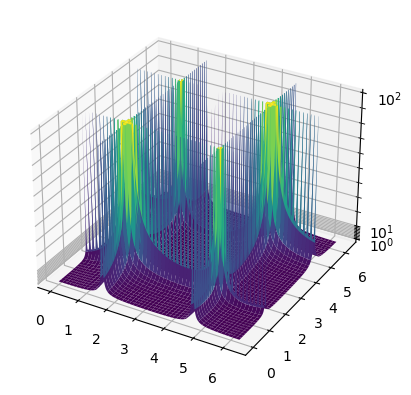

In [28]:
# Create a figure and a 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Val[Val > 100] = 100
# Create a 3D surface plot
surface = ax.plot_surface(T, P, Val, cmap='viridis')
ax.set_zlim(np.min(Val), 100)
ax.set_zscale("log")

In [17]:
Val[Val > 100] = 100

956827.6291316239

(0.7058871851323869, 1.0)

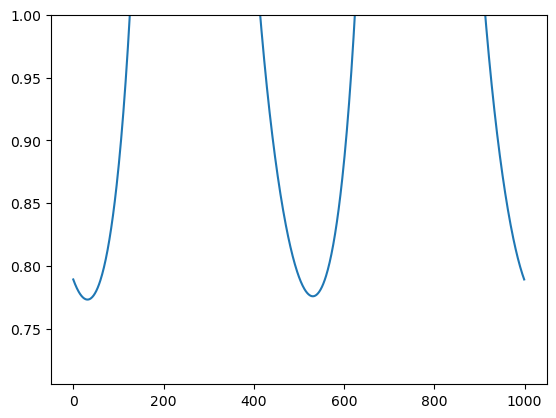

In [29]:
plt.plot(Val[0,:])
plt.ylim([np.min(Val[:,0]),1])

In [30]:
np.argwhere(Val == np.min(Val))

array([[ 83, 999]])

In [26]:
thetas[32]

0.20126319302276952